In [3]:
%load_ext autoreload
%autoreload 1
#%aimport topocalc.horizon

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import numpy as np
from skimage import data
import os
import sys
topocalc_path = "/Users/cailingallinger/repos/topocalc"
#topocalc_path = os.path.abspath(os.path.join('..'))
if topocalc_path in sys.path and topocalc_path != sys.path[0]:
    sys.path.insert(0,topocalc_path)
elif topocalc_path not in sys.path:
    sys.path.insert(0,topocalc_path)
print(sys.path)
from topocalc import horizon
from scipy.interpolate import interp2d, RectBivariateSpline

import matplotlib.pyplot as plt
#sys.path = [sys.path[-1]].append(sys.path[:-1])

dem = data.camera()
#print(sys.path)

x = np.arange(dem.shape[0])
y = np.arange(dem.shape[1])

xx,yy = np.meshgrid(x,y)

dem_interp = RectBivariateSpline(y,x,dem)

dem_square = dem_interp(y,x)

x2 = x[::2]
y2 = y

dem_rect_dxlong = dem_interp(y2,x2)

dx2 = np.diff(x2).min()
dy2 = np.diff(y2).min()
aspect_dxlong = dy2/dx2
print(aspect_dxlong)

x3 = x
y3 = y[::2]

dem_rect_dylong = dem_interp(y3,x3)

dx3 = np.diff(x3).min()
dy3 = np.diff(y3).min()
aspect_dylong = dy3/dx3
print(aspect_dylong)





['/Users/cailingallinger/repos/topocalc', '/Users/cailingallinger/repos/topocalc/notebooks', '/Users/cailingallinger/.vscode/extensions/ms-toolsai.jupyter-2021.6.999406279/pythonFiles/vscode_datascience_helpers', '/Users/cailingallinger/.vscode/extensions/ms-toolsai.jupyter-2021.6.999406279/pythonFiles', '/Users/cailingallinger/.vscode/extensions/ms-toolsai.jupyter-2021.6.999406279/pythonFiles/lib/python', '/Users/cailingallinger/anaconda3/envs/topocalc_testenv/lib/python37.zip', '/Users/cailingallinger/anaconda3/envs/topocalc_testenv/lib/python3.7', '/Users/cailingallinger/anaconda3/envs/topocalc_testenv/lib/python3.7/lib-dynload', '', '/Users/cailingallinger/anaconda3/envs/topocalc_testenv/lib/python3.7/site-packages', '/Users/cailingallinger/anaconda3/envs/topocalc_testenv/lib/python3.7/site-packages/setuptools_scm-4.1.2-py3.7.egg', '/Users/cailingallinger/anaconda3/envs/topocalc_testenv/lib/python3.7/site-packages/spatialnc-0.4.1-py3.7.egg', '/Users/cailingallinger/repos/topocalc',

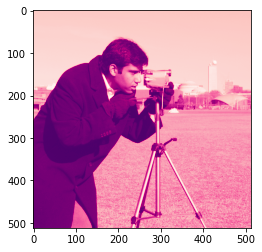

In [5]:
plt.imshow(dem_square,cmap='RdPu_r')

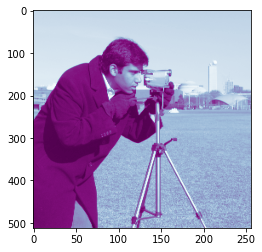

In [6]:
plt.imshow(dem_rect_dxlong,cmap='BuPu_r',aspect=aspect_dxlong)

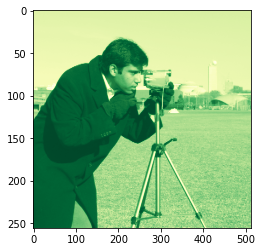

In [7]:
plt.imshow(dem_rect_dylong,cmap='YlGn_r',aspect=aspect_dylong)

In [8]:
dem_sq_skew = horizon.skew_interp(dem_square,-1,1,1,fwd=True)
dem_sq_unskew = horizon.skew_interp(-1,dem_sq_skew,-1,1,1,fwd=False)
plt.imshow(dem_sq_skew,cmap='RdPu_r')

print(dem_square.dtype,dem_sq_skew.dtype)
print(dem_square.shape,dem_sq_skew.shape)

TypeError: skew_interp() got multiple values for argument 'fwd'

float64 float64
(512, 512) (512, 512)


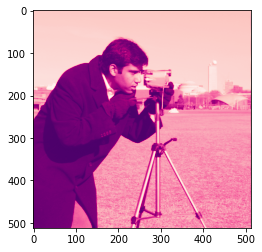

In [45]:
plt.imshow(dem_sq_unskew,cmap='RdPu_r')
print(dem_square.dtype,dem_sq_unskew.dtype)
print(dem_square.shape,dem_sq_unskew.shape)

-53.291015625
67.75
0.09022256359457968
0.0


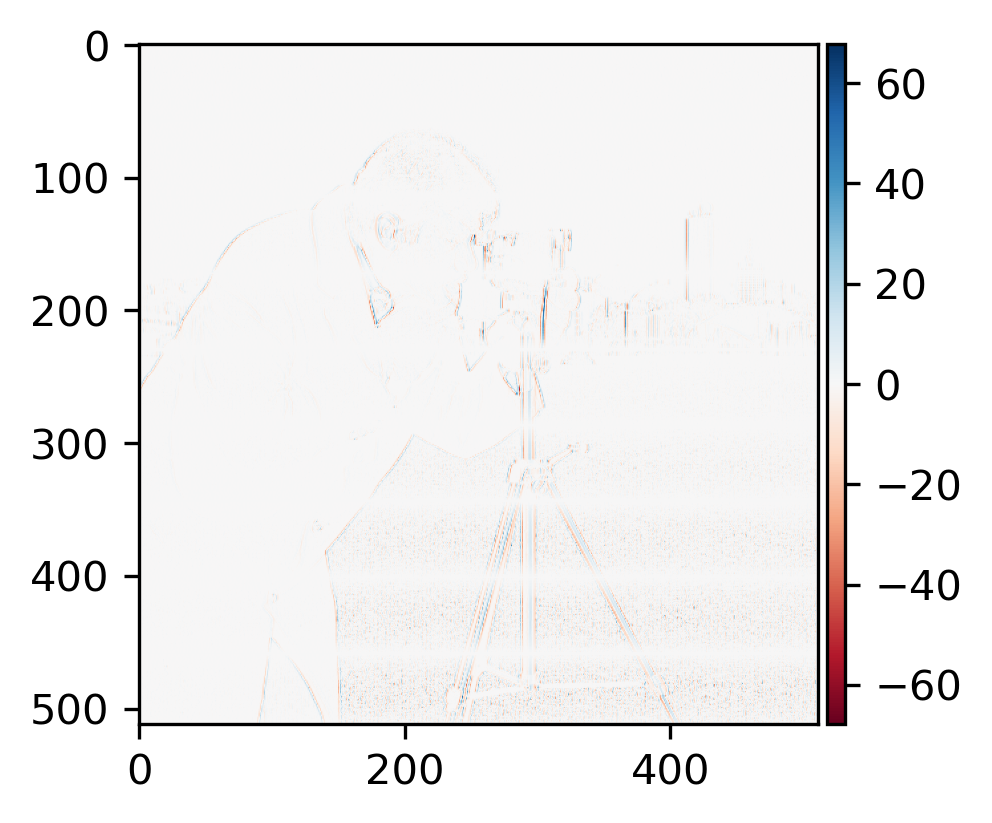

In [46]:
maxrange = np.max([np.abs(np.nanmin(dem_square-dem_sq_unskew)),np.nanmax(dem_square-dem_sq_unskew)])

fig1,ax1 = plt.subplots(figsize=(3,3),dpi=300)
pl1 = ax1.imshow(dem_square-dem_sq_unskew,cmap='RdBu',vmin=-maxrange,vmax=maxrange)
cax1 = fig1.add_axes([ax1.get_position().x1+0.01,ax1.get_position().y0,0.02,ax1.get_position().y1-ax1.get_position().y0])
fig1.colorbar(pl1,cax=cax1)

print(np.nanmin(dem_square-dem_sq_unskew))
print(np.nanmax(dem_square-dem_sq_unskew))
print(np.nanmean(dem_square-dem_sq_unskew))
print(np.nanmedian(dem_square-dem_sq_unskew))

(512, 256) (512, 260)


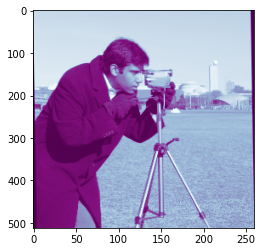

In [47]:
dem_rect_dxlong_skew = horizon.skew_interp(dem_rect_dxlong,-1,dx2,dy2,fwd=True)
dem_rect_dxlong_unskew = horizon.skew_interp(dem_rect_dxlong_skew,-1,dx2,dy2,fwd=False)
plt.imshow(dem_rect_dxlong_skew,cmap='BuPu_r',aspect=aspect_dxlong)

print(dem_rect_dxlong.shape,dem_rect_dxlong_skew.shape)

(512, 256) (512, 256)


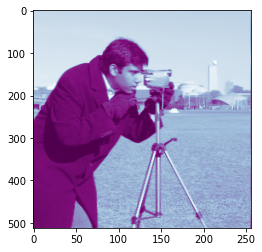

In [48]:
plt.imshow(dem_rect_dxlong_unskew,cmap='BuPu_r',aspect=aspect_dxlong)
print(dem_rect_dxlong.shape,dem_rect_dxlong_unskew.shape)

-76.4736328125
93.515625
0.18531090021133417
0.0


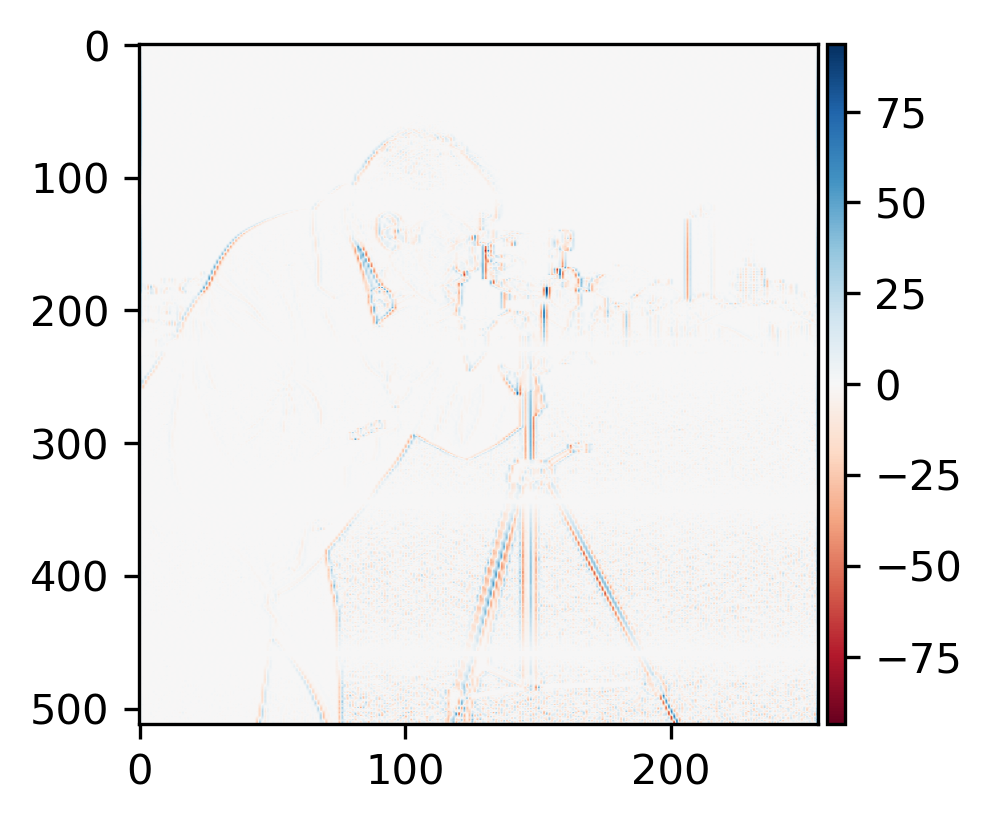

In [49]:
maxrange = np.max([np.abs(np.nanmin(dem_rect_dxlong-dem_rect_dxlong_unskew)),np.nanmax(dem_rect_dxlong-dem_rect_dxlong_unskew)])

fig2,ax2 = plt.subplots(figsize=(3,3),dpi=300)
pl2 = ax2.imshow(dem_rect_dxlong-dem_rect_dxlong_unskew,cmap='RdBu',aspect=aspect_dxlong,vmin=-maxrange,vmax=maxrange)
cax2 = fig2.add_axes([ax2.get_position().x1+0.01,ax2.get_position().y0,0.02,ax2.get_position().y1-ax2.get_position().y0])
fig2.colorbar(pl2,cax=cax2)

print(np.nanmin(dem_rect_dxlong-dem_rect_dxlong_unskew))
print(np.nanmax(dem_rect_dxlong-dem_rect_dxlong_unskew))
print(np.nanmean(dem_rect_dxlong-dem_rect_dxlong_unskew))
print(np.nanmedian(dem_rect_dxlong-dem_rect_dxlong_unskew))

In [50]:
print(dem_rect_dxlong.dtype)

float64


(256, 512) (256, 521)


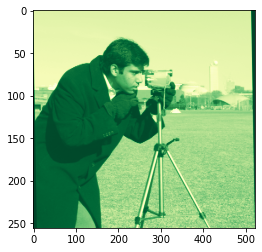

In [51]:
dem_rect_dylong_skew = horizon.skew_interp(dem_rect_dylong,-1,dx3,dy3,fwd=True)
dem_rect_dylong_unskew = horizon.skew_interp(dem_rect_dylong_skew,-1,dx3,dy3,fwd=False)
plt.imshow(dem_rect_dylong_skew,cmap='YlGn_r',aspect=aspect_dylong)

print(dem_rect_dylong.shape,dem_rect_dylong_skew.shape)

(512, 256) (512, 256)


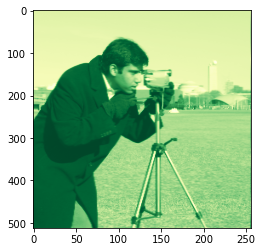

In [52]:
plt.imshow(dem_rect_dxlong_unskew,cmap='YlGn_r',aspect=aspect_dxlong)
print(dem_rect_dxlong.shape,dem_rect_dxlong_unskew.shape)

-51.796875000000014
67.75
0.09010809659957889
0.0


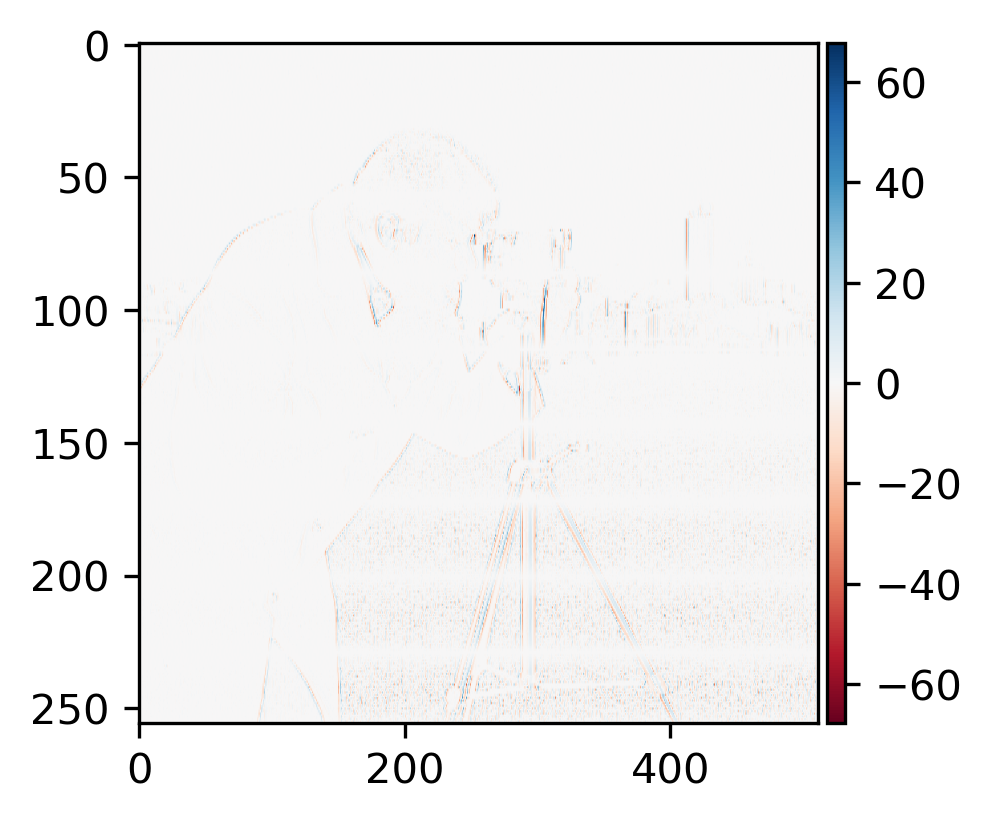

In [53]:
maxrange = np.max([np.abs(np.nanmin(dem_rect_dylong-dem_rect_dylong_unskew)),np.nanmax(dem_rect_dylong-dem_rect_dylong_unskew)])

fig3,ax3 = plt.subplots(figsize=(3,3),dpi=300)
pl3 = ax3.imshow(dem_rect_dylong-dem_rect_dylong_unskew,cmap='RdBu',aspect=aspect_dylong,vmin=-maxrange,vmax=maxrange)
cax3 = fig3.add_axes([ax3.get_position().x1+0.01,ax3.get_position().y0,0.02,ax3.get_position().y1-ax3.get_position().y0])
fig3.colorbar(pl3,cax=cax3)

print(np.nanmin(dem_rect_dylong-dem_rect_dylong_unskew))
print(np.nanmax(dem_rect_dylong-dem_rect_dylong_unskew))
print(np.nanmean(dem_rect_dylong-dem_rect_dylong_unskew))
print(np.nanmedian(dem_rect_dylong-dem_rect_dylong_unskew))

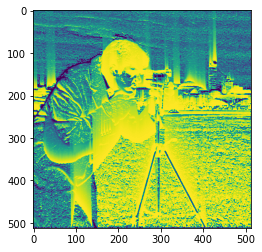

In [31]:
hor_sq = horizon.horizon_interp(1,dem_square,1,1)
plt.imshow(hor_sq)


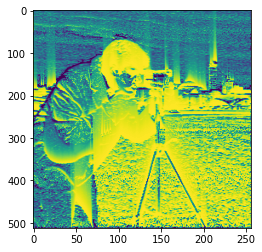

In [32]:
hor_dxlong = horizon.horizon_interp(1,dem_rect_dxlong,dx=dx2,dy=dy2)
hor_dylong = horizon.horizon_interp(1,dem_rect_dylong,dx=dx3,dy=dy3)

plt.imshow(hor_dxlong,aspect=aspect_dxlong)

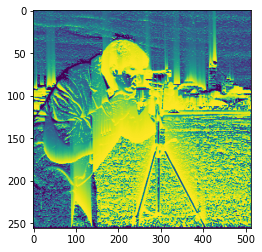

In [33]:
plt.imshow(hor_dylong,aspect=aspect_dylong)